In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import math
import csv
from sklearn.linear_model import LinearRegression


In [142]:
# set de datos
#En los cuatro datasets
#Examen 1 - 15% Todos
#Tarea 1 - 3.75% Todos
#Proyecto 1 - 11.25% Todos
#Proyecto 2 - 13.12% Todos

# Unificar los 4 set de datos, eliminar lo que no se necesita, ver outliers


#0) Ordenar ese data set

#1) Realizar un análisis estadístico básico del conjunto de datos, como calcular las estadísticas descriptivas (media, mediana, desviación estándar, etc.) 
#y la correlación entre las diferentes características.

#2) Visualizar los datos mediante gráficos para comprender mejor la relación entre las diferentes características y la calidad del vino.
#Por ejemplo, se pueden crear gráficos de dispersión para visualizar la relación entre cada característica y la calidad del vino.

#3) Realizar una limpieza de datos básica para tratar los valores perdidos y 
#los datos atípicos, que pueden afectar la precisión del modelo de regresión.

#4) Preprcesar los datos para meter las etiquetas de los valores buenos y malos

#5) Probarlo con las librerias y luego con el modelo manual y esperar que este bien xd 



# 1- Análisis estadístico

In [143]:
# Cargar el conjunto de datos en un marco de datos
Notas = pd.read_csv("DataSetGrades/Notas.csv")

#Varios valores estadisticos
print(Notas.describe())


          Examen1      Tarea1   Proyecto1   Proyecto2        Nota
count  102.000000  102.000000  102.000000  102.000000  102.000000
mean    42.665686   46.685294   64.125490   65.312745   66.008235
std     20.549224   37.049144   32.082628   29.468697   26.003992
min      0.000000    0.000000    0.000000    0.000000    0.750000
25%     29.200000   13.300000   40.500000   60.000000   60.435000
50%     41.650000   46.000000   70.800000   70.000000   74.430000
75%     56.850000   80.000000   94.750000   93.325000   81.752500
max     86.500000  100.000000  100.000000  100.000000   97.610000


In [144]:
# Cargar el conjunto de datos en un marco de datos
df = pd.read_csv("DataSetGrades/Notas.csv")

# Calcular la matriz de correlación
corr = df.corr()


# Cuales son los resultados que se tiene de diabetes.
columnas = df["Nota"].unique()

print(columnas)



[80.2   2.5  80.8  82.1  69.4  76.6  70.7  79.3  67.6  77.6  75.2  72.4
 78.6  25.9  67.9  50.2  68.2  82.9  76.3   2.   58.   68.3  73.1  69.6
 96.   64.97 79.64 11.69 10.8  96.1  70.44 91.5  54.59 91.8  69.24 76.9
 76.11 79.03 77.23  5.92 75.11 97.61 80.09 77.12 58.13 43.75 83.63 74.67
 81.16 73.35 81.03  1.25 78.57 78.19 92.61 72.41 93.99 79.1  47.13  4.09
 76.16 81.95 73.36 79.32 73.19  0.9  70.08 91.02 73.41 94.97 87.85 84.43
 67.94 10.86 66.38 59.96 74.19  0.75 61.86 38.39 39.24 87.62 87.61 10.44
 88.7  22.01 36.27 59.59 44.57 23.79 85.18 88.17 88.04 68.76 87.66 84.18
 87.47 86.24 87.31 69.37]


# 2- Visualización de los datos

<Axes: >

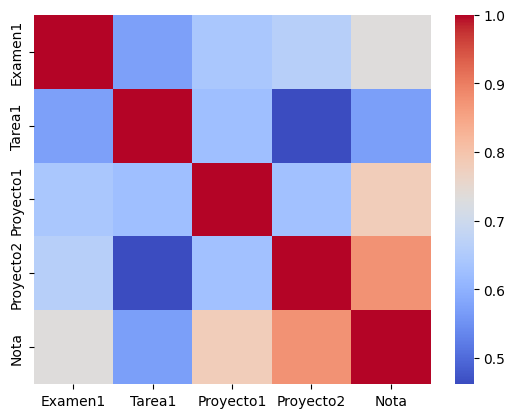

In [145]:
# Graficar la matriz de correlación utilizando un mapa de calor
sns.heatmap(corr, cmap='coolwarm')

In [146]:
# Crea la gráfica de cajas

# Muestra las gráficas de cajas para todos los features
#for feature in df.columns[:-1]:
#    sns.catplot(data=df, x='Nota', y=feature, kind='box')

# 3- Normalización

In [147]:
# Cargar el conjunto de datos
data= pd.read_csv("DataSetGrades/Notas.csv")

# Imputar valores faltantes
imputer = SimpleImputer(strategy="median")
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Eliminar valores atípicos
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

# Normalizar las variables de entrada
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(imputed_data.iloc[:, :-1]), columns=imputed_data.columns[:-1])

# Agregar la variable de salida
normalized_data["Nota"] = imputed_data["Nota"]



# Guardar los datos normalizados en un nuevo archivo CSV
normalized_data.to_csv("DataSetGrades/Notas-Normalizadas.csv", index=False)

print(normalized_data.head())


    Examen1  Tarea1  Proyecto1  Proyecto2  Nota
0  0.616185   0.760      1.000       1.00  80.2
1  0.145665   0.000      0.000       0.00   2.5
2  0.573410   1.000      1.000       0.45  80.8
3  0.712139   0.667      1.000       1.00  82.1
4  0.636994   0.240      0.425       0.60  69.4


# 4 - Preprocesamiento

In [165]:
# Leer el archivo CSV y cargarlo en un dataframe
normalized_data = pd.read_csv("DataSetGrades/Notas-Normalizadas.csv")

# Convertir la columna "quality" en una etiqueta binaria
# Reprovado: < 67.5
# Aprobado: > 67.5
normalized_data["Nota"] = pd.cut( normalized_data["Nota"], bins = [0.0, 67.5, 100], labels = ["Reprobado","Aprobado"])

# Contar cuántas etiquetas hay de cada tipo
print(normalized_data["Nota"].value_counts())
print(normalized_data.head())

# Codificar la etiqueta binaria como números usando LabelEncoder
lb = LabelEncoder()
normalized_data["Nota"] = lb.fit_transform(normalized_data["Nota"])



# Separar el conjunto de datos en variables de entrada y de salida
x = normalized_data.drop("Nota", axis = 1)
y = normalized_data["Nota"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10, stratify=y)




Aprobado     73
Reprobado    29
Name: Nota, dtype: int64
    Examen1  Tarea1  Proyecto1  Proyecto2       Nota
0  0.616185   0.760      1.000       1.00   Aprobado
1  0.145665   0.000      0.000       0.00  Reprobado
2  0.573410   1.000      1.000       0.45   Aprobado
3  0.712139   0.667      1.000       1.00   Aprobado
4  0.636994   0.240      0.425       0.60   Aprobado
    Examen1  Tarea1  Proyecto1  Proyecto2  Nota
0  0.616185   0.760      1.000       1.00     0
1  0.145665   0.000      0.000       0.00     1
2  0.573410   1.000      1.000       0.45     0
3  0.712139   0.667      1.000       1.00     0
4  0.636994   0.240      0.425       0.60     0


# 5- Aplicar modelo con librerias

In [149]:
#Arbol de decisiones
arbolDesiciones = DecisionTreeClassifier()
arbolDesiciones.fit(X_train, y_train)
y_respuesta = arbolDesiciones.predict(X_test)

Accuracy: 0.90
Recall: 0.83


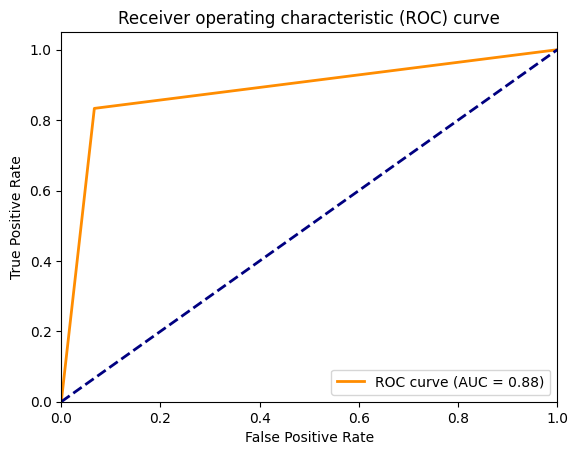

In [150]:

# Accuracy
accuracy = accuracy_score(y_test, y_respuesta)

# Precision
#precision = precision_score(y_test, y_respuesta)

# Recall
recall = recall_score(y_test, y_respuesta)

print("Accuracy: {:.2f}".format(accuracy))
#print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_respuesta)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [151]:
#KNN
sklearn_classifier = KNeighborsClassifier(n_neighbors=23).fit(X_train, y_train)
y_predKNN = sklearn_classifier.predict(X_test)

Accuracy: 0.86
Precision: 1.00
Recall: 0.50


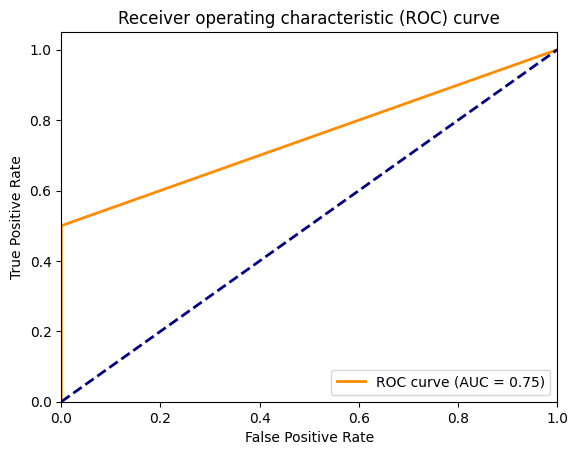

In [152]:
# Accuracy
accuracy = accuracy_score(y_test, y_predKNN)

# Precision
precision = precision_score(y_test, y_predKNN)

# Recall
recall = recall_score(y_test, y_predKNN)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predKNN)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [153]:
#Regresion logica
reglog = LogisticRegression()
reglog.fit(X_train, y_train)
y_predRL = reglog.predict(X_test)

Accuracy: 0.86
Precision: 1.00
Recall: 0.50


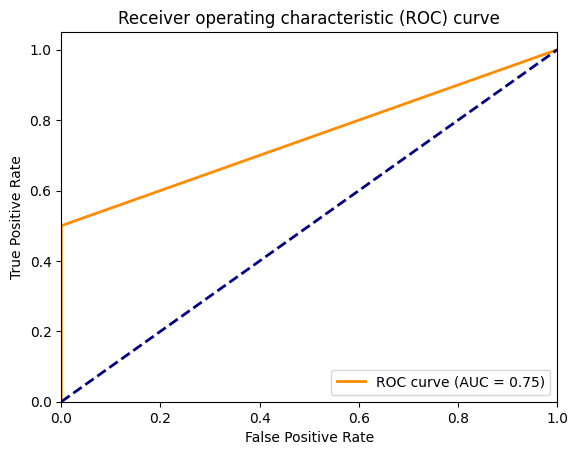

In [154]:
# Accuracy
accuracy = accuracy_score(y_test, y_predRL)

# Precision
precision = precision_score(y_test, y_predRL)

# Recall
recall = recall_score(y_test, y_predRL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predRL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

# 6- Aplicar modelo manual

In [155]:
#KNN

In [156]:
#Regresion logica
class OurLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
       

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.w = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.w -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    def score(self, y_pred,y_test):
        return float(sum(y_pred == y_test)) / float(len(y_test))

In [157]:
model = OurLogisticRegression(lr=0.9, num_iter=650)
model.fit(X_train, y_train)
probs = model.predict_prob(X_test)
y_predORL = model.predict(X_test, 0.5)

Accuracy: 0.95
Precision: 1.00
Recall: 0.83


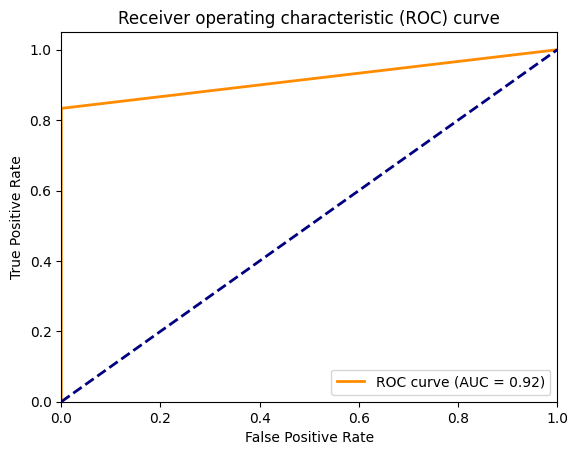

In [158]:
# Accuracy
accuracy = accuracy_score(y_test, y_predORL)

# Precision
precision = precision_score(y_test, y_predORL)

# Recall
recall = recall_score(y_test, y_predORL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predORL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [159]:
#Arbol de desiciones manual

# 7 - Puntos extra

In [166]:
# Creamos el modelo de regresión lineal con librerias
modelo = LinearRegression()

print(normalized_data.head())

# Extraemos las características y las etiquetas del conjunto de datos
x = normalized_data["Proyecto2"]
y = normalized_data["Nota"]

# Entrenamos el modelo utilizando los datos de entrada
modelo.fit(x, y)

# Predecimos valores utilizando el modelo
y_pred = modelo.predict(x)



    Examen1  Tarea1  Proyecto1  Proyecto2  Nota
0  0.616185   0.760      1.000       1.00     0
1  0.145665   0.000      0.000       0.00     1
2  0.573410   1.000      1.000       0.45     0
3  0.712139   0.667      1.000       1.00     0
4  0.636994   0.240      0.425       0.60     0


ValueError: Expected 2D array, got 1D array instead:
array=[1.    0.    0.45  1.    0.6   0.6   0.6   1.    0.62  1.    0.6   0.6
 0.6   0.62  0.6   0.6   0.45  0.6   0.6   0.54  0.    0.62  0.62  0.6
 0.6   1.    0.6   1.    0.    0.    1.    0.6   1.    0.6   1.    0.6
 0.75  0.75  0.75  0.75  0.    0.75  1.    0.75  0.7   0.45  0.45  0.95
 0.65  0.7   0.95  0.97  0.7   0.    0.633 0.7   0.97  0.7   0.97  0.95
 0.45  0.    0.7   0.7   0.65  0.7   0.633 0.    0.95  0.97  0.633 1.
 1.    0.7   0.717 0.    0.55  0.55  0.7   0.    0.55  1.    0.48  0.883
 0.883 0.    1.    0.    0.48  0.717 0.48  0.48  0.7   1.    0.717 0.717
 0.883 0.7   0.883 1.    1.    1.   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Intercepto: 1.0689661158699022
Pendiente: 0.1267447264625816


ValueError: x and y must be the same size

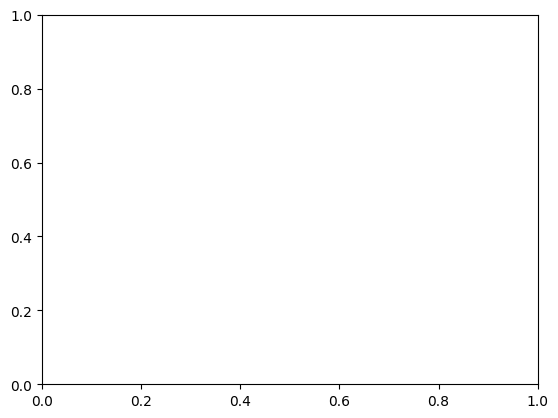

In [ ]:


# Imprimimos los coeficientes de la regresión
print('Intercepto:', modelo.intercept_)
print('Pendiente:', modelo.coef_[0])

# Graficamos los resultados
plt.scatter(y, y_pred)
plt.xlabel('Precios reales')
plt.ylabel('Precios predichos')
plt.title('Regresión lineal para precios de casas en Boston')
plt.show()
